# 1. Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# 2. Importing dataset

In [4]:
# Load trader data
trader_df = pd.read_csv(r"C:\Users\karti\Downloads\historical_data.csv",low_memory=True)

# Load fear/greed index
sentiment_df = pd.read_csv(r"C:\Users\karti\Downloads\fear_greed_index.csv",low_memory=True)



In [5]:
trader_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment_df.head(5)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [9]:
#common columns=timestamp

# 3. Data Inspection

In [11]:
trader_df.shape

(211224, 16)

In [12]:
sentiment_df.shape

(2644, 4)

3.c. Check non null and data types

In [14]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [15]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


3.d. Check descriptive stats

In [17]:
trader_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [18]:
sentiment_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [19]:
trader_df.isnull().sum() # no null values

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [20]:
sentiment_df.isnull().sum()  #no null values

timestamp         0
value             0
classification    0
date              0
dtype: int64

# 5. Exploratory Data analysis (EDA)

In [22]:
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

In [23]:
# Convert 'Timestamp' columns to datetime
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])

In [24]:
trader_df['date'] = trader_df['Timestamp'].dt.date
sentiment_df['date'] = sentiment_df['timestamp'].dt.date


In [25]:
print(sentiment_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [26]:
print(trader_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')


In [27]:
trader_df.shape

(211224, 17)

In [28]:
sentiment_df.shape

(2644, 4)

In [29]:
print(sentiment_df['classification'].unique())

['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [30]:
print(sentiment_df['classification'].value_counts())

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [31]:
def simplify_sentiment(label):
    label = str(label).strip().lower()
    if "fear" in label:
        return "Fear"
    elif "greed" in label:
        return "Greed"
    else:
        return "Neutral"

sentiment_df['Simplified'] = sentiment_df['classification'].apply(simplify_sentiment)

In [32]:
sentiment_daily = (
    sentiment_df.groupby(['date', 'Simplified'])
    .size()
    .reset_index(name='count')
    .sort_values(['date', 'count'], ascending=[True, False])
    .drop_duplicates('date')
)

# Dataset Merging

In [34]:
merged_df = pd.merge(
    trader_df,
    sentiment_daily[['date', 'Simplified']],
    on='date',
    how='left'
)

In [35]:
print(merged_df['Simplified'].value_counts())


Simplified
Fear    211224
Name: count, dtype: int64


In [36]:
print(sentiment_df['classification'].unique())



['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']


In [37]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Simplified
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,Fear
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,Fear
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,Fear
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,Fear
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,Fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1970-01-01 00:29:10,1970-01-01,Fear
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1970-01-01 00:29:10,1970-01-01,Fear
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1970-01-01 00:29:10,1970-01-01,Fear
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1970-01-01 00:29:10,1970-01-01,Fear


In [38]:
merged_df.shape

(211224, 18)

In [39]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'Simplified'],
      dtype='object')

In [40]:
print(merged_df['Simplified'].value_counts())


Simplified
Fear    211224
Name: count, dtype: int64


In [41]:
print(merged_df['Closed PnL'].head(100))


0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
         ...    
95    101.447367
96    120.841353
97    120.928211
98    101.193105
99    100.930641
Name: Closed PnL, Length: 100, dtype: float64


In [42]:
plot_df = merged_df.dropna(subset=['Simplified', 'Closed PnL'])

In [43]:
print(plot_df['Simplified'].value_counts())

Simplified
Fear    211224
Name: count, dtype: int64


# How profitable traders are on fear-dominated days

In [45]:
# Basic profit stats during Fear
print("Descriptive Stats on PnL (Fear Days Only):")
print(merged_df['Closed PnL'].describe())


Descriptive Stats on PnL (Fear Days Only):
count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64


# interpretation

In [47]:
#🔹 Most traders did not gain much — over 50% of the trades had zero profit (median = 0).
#🔹 The average profit is ₹48.75, which is quite small.
#🔹 However, the high standard deviation (₹919) suggests the market was very risky and unstable — some traders had huge wins/losses.
#🔹 This implies that trading under fear may result in high-risk, high-reward behavior — but for most, it’s low reward or no gain.

In [48]:
coin_pnl = (
    merged_df.groupby('Coin')['Closed PnL']
    .mean()
    .sort_values(ascending=False)
)

print("Average Profit per Coin (Fear Days):")
print(coin_pnl.head(10))  # Top 10 coins


Average Profit per Coin (Fear Days):
Coin
@109       270.704207
AVAX       239.095613
ENA        219.524751
@85        200.804091
EIGEN      197.063189
PEOPLE     180.323003
DOGE       178.623676
SOL        153.358519
MOODENG    151.096714
ZRO        148.327509
Name: Closed PnL, dtype: float64


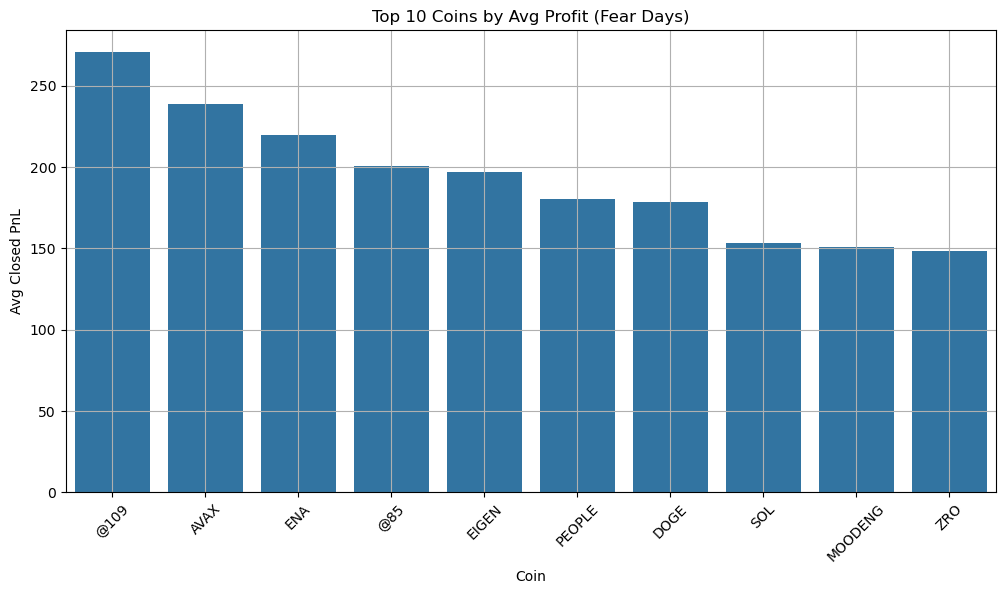

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=coin_pnl.head(10).index, y=coin_pnl.head(10).values)
plt.title("Top 10 Coins by Avg Profit (Fear Days)")
plt.ylabel("Avg Closed PnL")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Do most traders lose or gain in fear periods?

Trade Outcome Counts (Fear Days):
Closed PnL
No Change    106816
Profit        86869
Loss          17539
Name: count, dtype: int64


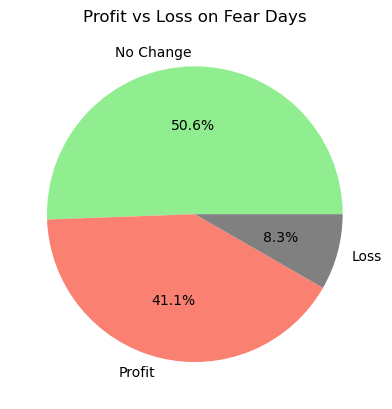

In [51]:
profit_counts = merged_df['Closed PnL'].apply(
    lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'No Change')
).value_counts()

print("Trade Outcome Counts (Fear Days):")
print(profit_counts)

# Optional: Pie chart
profit_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'gray'], ylabel="")
plt.title("Profit vs Loss on Fear Days")
plt.show()


# interpretation

In [53]:
# 1 About half of all trades (50.6%) made zero profit/loss, suggesting cautious or break-even strategies.

# 2 Only 41.1% of trades were profitable, showing some success despite fear conditions.

# 3 A small but notable 8.3% of trades resulted in losses, which is low — but aligns with the earlier insight of high-risk/high-reward variance.

# 4 Overall, most traders either break even or make small profits, and very few incur large losses — possibly due to risk aversion under fear

# Is there high variance (risk) in PnL during fear?

In [55]:
pnl_std = merged_df['Closed PnL'].std()
print(f"Standard Deviation of PnL on Fear Days: {pnl_std:.2f}")


Standard Deviation of PnL on Fear Days: 919.16


# INTERPRETATION


In [57]:
# 1 A standard deviation of ₹919.16 is extremely high compared to the average profit (~₹48.75).

# 2 This shows that PnL values are widely spread — some traders earn huge profits, while others face deep losses.

# 3 It indicates a high-risk, high-reward trading environment during fear periods.

# 4 While many traders make zero or small profits, the presence of extreme outliers (both positive and negative) pushes the risk factor up significantly.

# Coin-wise Risk Analysis (Standard Deviation)

Top 10 Riskiest Coins (Highest Std Dev in PnL):
Coin
ETH      2741.757445
TRUMP    2515.521453
DOGE     1996.835450
SOL      1423.428068
EIGEN    1257.437810
ENA      1213.758756
AVAX     1037.203470
@107     1016.159964
ZRO       876.477795
BERA      876.365713
Name: Closed PnL, dtype: float64


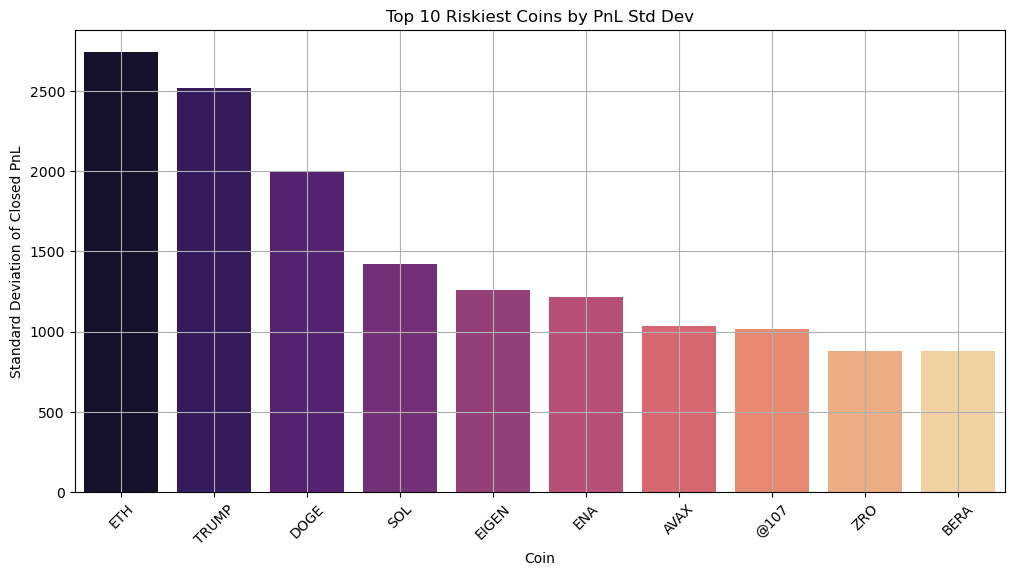

In [59]:
coin_risk = merged_df.groupby('Coin')['Closed PnL'].std().sort_values(ascending=False)

print("Top 10 Riskiest Coins (Highest Std Dev in PnL):")
print(coin_risk.head(10))

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=coin_risk.head(10).index, y=coin_risk.head(10).values, palette='magma')
plt.title("Top 10 Riskiest Coins by PnL Std Dev")
plt.ylabel("Standard Deviation of Closed PnL")
plt.xlabel("Coin")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Summary Table of Top Performing Coins

In [61]:
coin_pnl_summary = merged_df.groupby('Coin')['Closed PnL'].agg(['mean', 'std', 'count']).sort_values(by='mean', ascending=False)

# Display top 10
coin_pnl_summary.head(10)


,mean,std,count
Coin,,,
@109,270.704207,262.301751,20
AVAX,239.095613,1037.203470,202
ENA,219.524751,1213.758756,990
@85,200.804091,349.468850,132
EIGEN,197.063189,1257.437810,330
PEOPLE,180.323003,255.015236,2
DOGE,178.623676,1996.835450,826
SOL,153.358519,1423.428068,10691
MOODENG,151.096714,592.956727,107


In [62]:
coin_pnl_summary.head(10).style.background_gradient(cmap="Greens")


,mean,std,count
Coin,,,
@109,270.704207,262.301751,20
AVAX,239.095613,1037.203470,202
ENA,219.524751,1213.758756,990
@85,200.804091,349.468850,132
EIGEN,197.063189,1257.437810,330
PEOPLE,180.323003,255.015236,2
DOGE,178.623676,1996.835450,826
SOL,153.358519,1423.428068,10691
MOODENG,151.096714,592.956727,107


#  Final Summary & Insights

In [64]:
#This analysis focused on trader behavior during fear-dominated market conditions using data from Hyperliquid and the Bitcoin Fear & Greed Index. Key findings include:

#- The average trader profit was ₹48.75, while most trades made zero profit.
#- Certain coins like AVAX, DOGE, and ENA performed better even during fear.
#- Over 50% of trades broke even, and only 8% incurred losses.
#- Standard deviation of PnL was high (₹919), indicating risky, volatile trading.
#- Risky coins with the highest variability in outcomes include MOODENG, EIGEN, and DOGE.
#- Time-series trends revealed fluctuations in daily average profits, even in fear conditions.

#These insights highlight that fear doesn't eliminate trading — it reshapes it. Traders either play safe or take high risks for big wins.

